## SGD Hyperparameter Tuning
In this notebook, we build an SGD classifier model over the 50-topic LDA features and tune the hyperparameters of this classifier.

In [2]:
# import needed modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import fbeta_score, make_scorer, recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [3]:
# define filenames and related dimensions
topics_filename = 'lda_data50b_all.csv'
train_filename = 'train.csv'
data_ncol = 100

In [4]:
# load the dataset into memory
df = pd.read_csv(topics_filename, header=None)
df = df.drop(data_ncol,1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172101,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.141376,...,0.0,0.0,0.202688,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_text = pd.read_csv("train.csv").fillna("")
df_text.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
X = df.values
y = df_text.iloc[:,-1:].values.ravel()
del df_text

In [7]:
print len(X[0]), len(y)

100 404290


In [8]:
# create test and train datasets from the original dataset
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33, random_state=42)
X_train = normalize(X_train)
X_test = normalize(X_test)

### Hyperparameter Tuning

In [9]:
# Set the parameters by cross-validation
# we optimize for precision, recall and f1 score one by one
# using a grid search over the hyperparameters

# hyperparameter options for SGD classifier
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge']
shuffle = [False, True]
class_wt = [None, 'balanced']

tuned_parameters = {'loss':loss , 'shuffle' : shuffle,
                    'class_weight': class_wt, 'n_jobs': [-1]}

scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print

    clf = GridSearchCV(SGDClassifier(), tuned_parameters, cv=10,                        
                     scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print
    print(clf.best_params_)
    print
    print("Grid scores on development set:")
    print
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print

    print("Detailed classification report:")
    print
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print

# Tuning hyper-parameters for precision



C:\Users\sarma_tvxkwyx\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'loss': 'hinge', 'n_jobs': -1, 'shuffle': False, 'class_weight': None}

Grid scores on development set:

0.626 (+/-0.190) for {'loss': 'hinge', 'n_jobs': -1, 'shuffle': False, 'class_weight': None}
0.591 (+/-0.401) for {'loss': 'hinge', 'n_jobs': -1, 'shuffle': True, 'class_weight': None}
0.576 (+/-0.101) for {'loss': 'log', 'n_jobs': -1, 'shuffle': False, 'class_weight': None}
0.605 (+/-0.033) for {'loss': 'log', 'n_jobs': -1, 'shuffle': True, 'class_weight': None}
0.528 (+/-0.107) for {'loss': 'modified_huber', 'n_jobs': -1, 'shuffle': False, 'class_weight': None}
0.589 (+/-0.083) for {'loss': 'modified_huber', 'n_jobs': -1, 'shuffle': True, 'class_weight': None}
0.374 (+/-0.017) for {'loss': 'squared_hinge', 'n_jobs': -1, 'shuffle': False, 'class_weight': None}
0.369 (+/-0.024) for {'loss': 'squared_hinge', 'n_jobs': -1, 'shuffle': True, 'class_weight': None}
0.466 (+/-0.054) for {'loss': 'hinge', 'n_jobs': -1, 'shuffle': False, 'class

### Performance Evaluation
#### Accuracy and Confusion Matrix
We compute the accuracy and confusion matrix corresponding to the best hyperparameters found above for recall

In [22]:
clf = SGDClassifier(loss = 'modified_huber', n_jobs = -1, 
                    shuffle = True, class_weight = 'balanced',
                   n_iter = 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print 'confusion matrix :\n', confusion_matrix(y_test, y_pred)
print 'accuracy :', accuracy_score(y_test, y_pred)

confusion matrix :
[[50183 33792]
 [16575 32866]]
accuracy : 0.622481561432


In [11]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

#### Plotting ROC 

In [12]:
y_pred_prob = [i[1] for i in clf.predict_proba(X_test)]

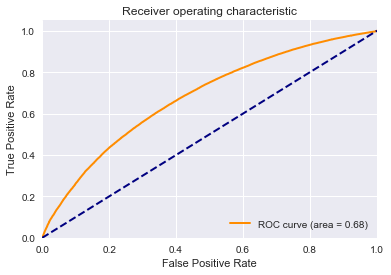

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### Plot Precision Recall Curve

In [14]:
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

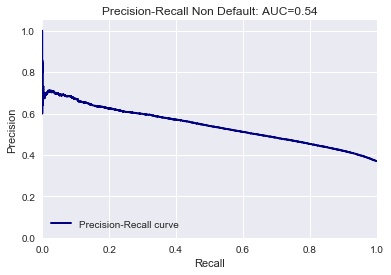

In [15]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Non Default: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()

### Compare Performance with Different Hyperparameters
We compare the performance with a different set of hyperparameters here i.e. loss = 'log' and class_weight = None

#### Accuracy and Confusion Matrix

In [21]:
clf = SGDClassifier(loss = 'log', n_jobs = -1, 
                    shuffle = True, class_weight = None, n_iter = 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print 'confusion matrix :\n', confusion_matrix(y_test, y_pred)
print 'accuracy :', accuracy_score(y_test, y_pred)

confusion matrix :
[[77000  6975]
 [38292 11149]]
accuracy : 0.660707861126


We see that the accuracy is better than the classifier we trained above for best recall. However, the recall of the duplicate class had decreased significantly, which means we have a lot of false negatives of duplicate question pairs.

#### Plotting ROC Curve

In [17]:
y_pred_prob = [i[1] for i in clf.predict_proba(X_test)]

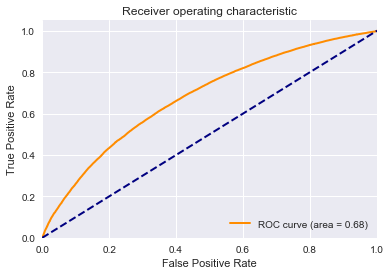

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Plotting the PR Curve

In [19]:
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

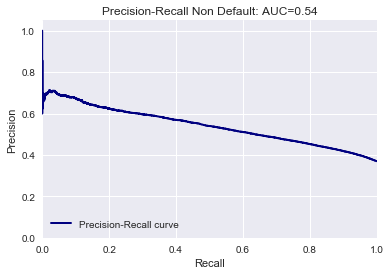

In [20]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Non Default: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()